In [1]:
from qiskit import QuantumCircuit, Aer, transpile


In [2]:
from qiskit_aer import AerSimulator


In [3]:
from qiskit.visualization import plot_histogram

In [4]:
def init_circ():
    circ = QuantumCircuit(2)
    circ.h(0)
    circ.h(1)
    circ.barrier()
    return circ

In [5]:
def oracle_grimoire_1(circ):
    circ.x(0)
    circ.x(1)
    circ.cz(0, 1)
    circ.x(0)
    circ.x(1)
    circ.barrier()

In [6]:
def oracle_grimoire_2(circ):
    circ.x(1)
    circ.cz(0, 1)
    circ.x(1)
    circ.barrier()

In [7]:
def oracle_grimoire_3(circ):
    circ.x(0)
    circ.cz(0, 1)
    circ.x(0)
    circ.barrier()

In [8]:
def oracle_grimoire_4(circ):
    circ.cz(0, 1)
    circ.barrier()

In [9]:
def diffuseur(circ):
    circ.h(0)
    circ.h(1)
    circ.z(0)
    circ.z(1)
    circ.cz(0,1)
    circ.h(0)
    circ.h(1)
    circ.barrier()

In [10]:
def build_circ(grimoire):
    circ = init_circ()

    if grimoire == 1:
        oracle_grimoire_1(circ)
    elif grimoire == 2:
        oracle_grimoire_2(circ)
    elif grimoire == 3:
        oracle_grimoire_3(circ)
    else:
        oracle_grimoire_4(circ)

    diffuseur(circ)
    return circ

In [11]:
def simulate(circ):
    all_states = {'00': 0, '01': 0, '10': 0, '11': 0}
    circ.measure_all()
    simulator: AerSimulator = Aer.get_backend('aer_simulator')
    circ = transpile(circ, simulator)
    result = simulator.run(circ).result()
    counts = result.get_counts(circ)

    all_states.update(counts)
    return all_states

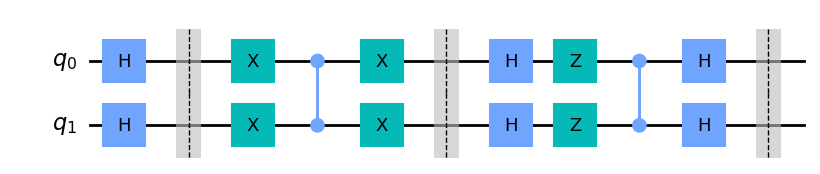

In [12]:
circ = build_circ(grimoire=1)
circ.draw("mpl")

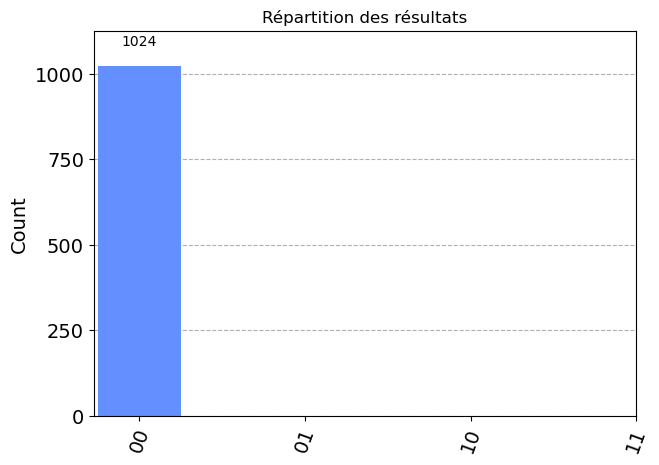

In [13]:
counts = simulate(circ)
plot_histogram(counts, title="Répartition des résultats")

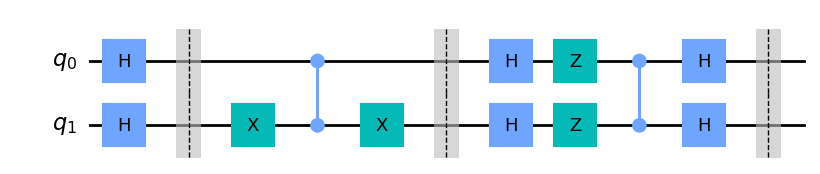

In [14]:
circ = build_circ(grimoire=2)
circ.draw("mpl")

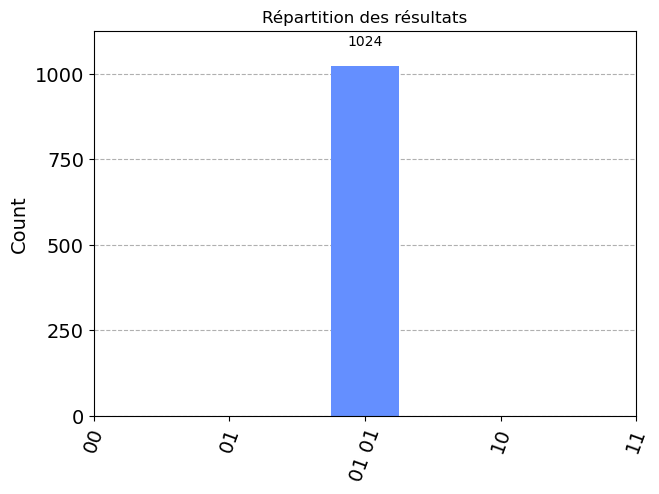

In [16]:
counts = simulate(circ)
plot_histogram(counts, title="Répartition des résultats")

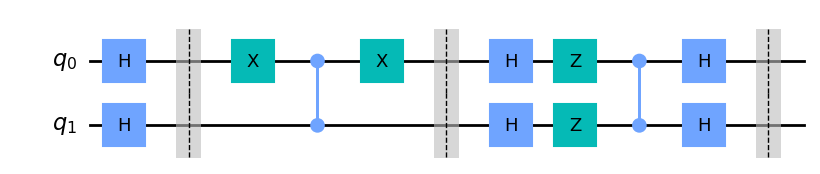

In [17]:
circ = build_circ(grimoire=3)
circ.draw("mpl")

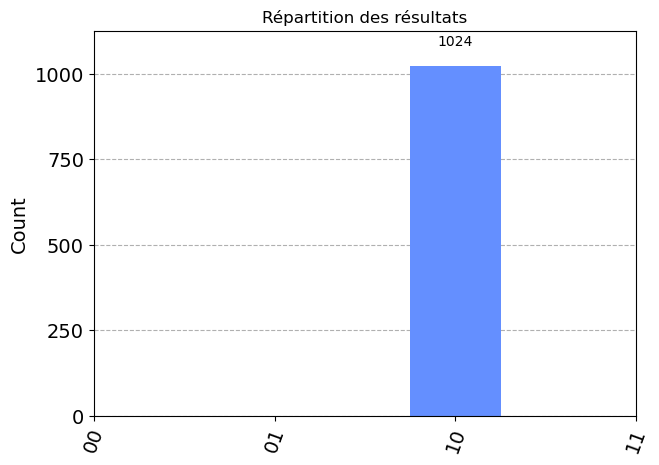

In [18]:
counts = simulate(circ)
plot_histogram(counts, title="Répartition des résultats")

In [ ]:


circ = build_circ(grimoire=4)
circ.draw("mpl")